# EDA Notebook - Kaelyn Isaac Parris

**Problem Statement:**

> Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

In [78]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sqlite3

%matplotlib inline

In [79]:
# Connect to IMDB
conn = sqlite3.connect('./data/im.db')

In [80]:
# Look at the tables.
pd.read_sql(
    '''
    SELECT * 
    FROM sqlite_master
    ;
    ''', conn)

# I got this command from the sql_queries notebook, from the lecture material

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


There's another one that's recommended - movie_gross.

Can I combine these into a single dataframe?

In [81]:
movie_gross = pd.read_csv('./data/bom.movie_gross.csv')

In [82]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Only 3387 rows. I could maybe match this up by title after I have filtered the other two frames.

# movie_ratings

In [83]:
# Taking a look at the first recommended.
df1 = pd.read_sql(
    '''
    SELECT * 
    FROM movie_ratings
    ;
    ''', conn)

In [84]:
df1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Looks like no nulls

In [86]:
df1.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

# movie_basics

In [87]:
# Taking a look at the second recommended.
df2 = pd.read_sql(
    '''
    SELECT * 
    FROM movie_basics
    ;
    ''', conn)

In [88]:
df2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [90]:
df2.shape

(146144, 6)

In [91]:
# Looks like we've got some missing values
df2.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

A significant amount in the runtime_minutes column.

# Combining movie_ratings and movie_basics

Looks like there is a difference between the number of rows in movie_ratings and movie_basics.

This must mean there are movies without ratings.

I should only include the ones with ratings. 

In [92]:
t1 = pd.read_sql(
    '''
    SELECT * 
    FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
    ;
    ''', conn)

Does the order matter?

In [93]:
t2 = pd.read_sql(
    '''
    SELECT * 
    FROM movie_ratings
    JOIN movie_basics
        USING(movie_id)
    ;
    ''', conn)

doesn't look like it

check nulls to make sure.

In [94]:
print(t1.isna().sum())
print()
print(t2.isna().sum())

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64


So no meaningful difference.

In [95]:
# Just pick one
df = pd.read_sql(
    '''
    SELECT * 
    FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
    ;
    ''', conn)

In [96]:
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [97]:
df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

So the rows without runtime minutes should definitely be dropped.

Reviewing the problem statement:

*You are charged with exploring what types of films are currently doing the best at the box office.*

I can probably keep the rows without genres and fill them with "Unknown" or something. Their data will still be useful.

looking at the new df

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [99]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [100]:
df.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

What are all the genres included?

In [101]:
df['genres'].value_counts()

Drama                           11612
Documentary                     10313
Comedy                           5613
Horror                           2692
Comedy,Drama                     2617
                                ...  
Drama,Family,Western                1
Documentary,History,Musical         1
Documentary,Music,Reality-TV        1
Biography,History,Romance           1
Biography,Drama,News                1
Name: genres, Length: 923, dtype: int64

okay so there's a lot

How do I want to slice this to get information from it?

In [102]:
# fig, ax = plt.subplots()

# # Use seaborn to plot two facets of the above data, colored by the target column
# sns.scatterplot(x='averagerating', y='runtime_minutes', data=df)

# ax.set_title('runtime_minutes vs averagerating')
# ax.legend();

Looks like there's too much here for me to sice it.

In [103]:
# fig, ax = plt.subplots()

# # Use seaborn to plot two facets of the above data, colored by the target column
# sns.scatterplot(x='averagerating', y='genres', data=df)

# ax.set_title('genres vs averagerating')
# ax.legend();

I've got to figure out some way to fiter this down.

Filtering it down by genre sounds like a good idea, but idk how many mixed genres there are.

I'll have to export the list as an excel file and check since there are like 900 rows.

In [104]:
#df['genres'].to_excel('outputhehe.xlsx')

I need to figure out all the possible inputs, then I can filter down

It's going to be difficult with so many overlaps.

In [105]:
df.shape

(73856, 8)

There are 73,856 rows.

In [106]:
df['genres'].value_counts().index

Index(['Drama', 'Documentary', 'Comedy', 'Horror', 'Comedy,Drama', 'Thriller',
       'Drama,Romance', 'Comedy,Romance', 'Comedy,Drama,Romance',
       'Horror,Thriller',
       ...
       'Adventure,Documentary,Horror', 'Comedy,History,Mystery',
       'Adventure,Fantasy,War', 'Biography,History,Music',
       'Animation,Sci-Fi,War', 'Drama,Family,Western',
       'Documentary,History,Musical', 'Documentary,Music,Reality-TV',
       'Biography,History,Romance', 'Biography,Drama,News'],
      dtype='object', length=923)

And 923 possible genre combinations of movies.

Perhaps it would be easiest to keep only the first genre?

Also, a lot of these are repeated. Maybe if there's only a short list of genres I can filter by that.

If there's more than 6 it's probably too difficult.

Let's take a look at one of the mixed genre titles.

In [107]:
df.loc[df['genres'] == 'Animation,History,Musical']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
8612,tt1731145,Héroes verdaderos,Héroes verdaderos,2010,90.0,"Animation,History,Musical",5.7,43


absolutely no idea what that is

try a different one

In [108]:
df.loc[df['genres'] == 'Horror,Sci-Fi,War']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
58004,tt5958758,Weresquito: Nazi Hunter,Weresquito: Nazi Hunter,2016,78.0,"Horror,Sci-Fi,War",5.3,61


wow

In [109]:

df.loc[df['genres'] == 'Animation,Family,Sci-Fi']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
54379,tt5502946,Barbie: Star Light Adventure,Barbie: Star Light Adventure,2016,79.0,"Animation,Family,Sci-Fi",6.0,445


dropping all but the first doesn't seem like such a bad idea

this assumes that the genres go by priority
barbie star light adventure is probably more of an animation than a scifi movie

maybe if I drop all but the first, i can get my list of possible inputs easier

let's try it

In [110]:
# First make a copy

df_test = df.copy()

In [111]:
df_test

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


Use the applymap function

`df_test['genres'].applymap`

Actually I think I can use a string function

I can use split to split it into three and then assign back the first one?

Turns out you can do all this in one line of code, and I did it in my last project

In [112]:
# Here's the code from the previous project.
#df_clean['make'] = df_clean['make'].str.split().str[0]

df_test['genres'] = df_test['genres'].str.split(',').str[0]
df_test['genres']

0             Action
1          Biography
2              Drama
3             Comedy
4             Comedy
            ...     
73851    Documentary
73852          Drama
73853    Documentary
73854           None
73855    Documentary
Name: genres, Length: 73856, dtype: object

Success

Let's see what the state space of the genres is.

In [113]:
df_test['genres'].value_counts()

Drama          18572
Comedy         14649
Documentary    13962
Action          6988
Horror          4490
Biography       3433
Adventure       2596
Crime           2494
Thriller        1563
Animation        962
Romance          786
Family           604
Mystery          433
Fantasy          429
Sci-Fi           388
Music            192
Musical          153
History          136
Sport             89
Western           75
War               47
Reality-TV         5
News               4
Adult              1
Game-Show          1
Name: genres, dtype: int64

Now that's more like it.

What happens if I run my graphs from before again?

No handles with labels found to put in legend.


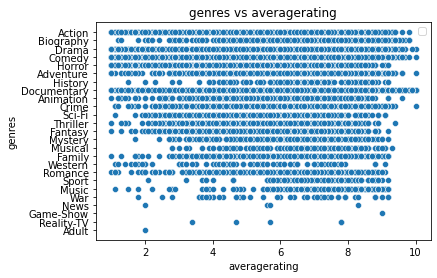

In [114]:
fig, ax = plt.subplots()

sns.scatterplot(x='averagerating', y='genres', data=df_test)

ax.set_title('genres vs averagerating')
ax.legend();

No handles with labels found to put in legend.


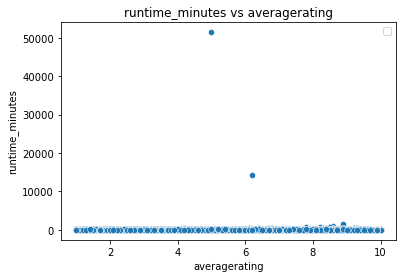

In [115]:
fig, ax = plt.subplots()

sns.scatterplot(x='averagerating', y='runtime_minutes', data=df_test)

ax.set_title('runtime_minutes vs averagerating')
ax.legend();

It looks like there are two wild outliers when it comes to runtime.

I want to take a closer look at the runtime distribution.

I'm going to graph it as a normal distribution and see what I get.

# histplot line

In [116]:
#sns.histplot(data='df_test', x='runtime_minutes', kde=True)

In [117]:
#df_test['runtime_minutes'].plot(kind='bar')

In [118]:
df_test

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Comedy,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


Oh there are nans in the runtime column

Need to take care of those before I can plot anything.

In [119]:
df_test = df_test.dropna(subset=['runtime_minutes'])
df_test.isna().sum()

movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres             516
averagerating        0
numvotes             0
dtype: int64

I think the problem was I had the name of the dataframe in quotes

This is going to take a second.

In [120]:
# sns.histplot(data=df_test, x='runtime_minutes')

In [121]:
df_test['runtime_minutes'].value_counts().head(20)

90.0     4742
80.0     2166
85.0     2057
100.0    1957
95.0     1933
93.0     1547
88.0     1487
92.0     1434
87.0     1381
94.0     1378
86.0     1352
75.0     1297
98.0     1284
91.0     1273
96.0     1266
82.0     1252
89.0     1247
97.0     1226
84.0     1208
105.0    1198
Name: runtime_minutes, dtype: int64

okay 4742 minutes is way too long.

Let's drop that and see if the graph's readability improves.

In [122]:
# Split again before dropping

df_test_dropped = df_test.copy()

In [123]:
df_test.shape

(66236, 8)

In [124]:
df_test_dropped.shape

(66236, 8)

In [125]:
df_test_dropped['runtime_minutes']

0        175.0
1        114.0
2        122.0
4         80.0
6         83.0
         ...  
73849    130.0
73850     86.0
73851     75.0
73852     98.0
73855     72.0
Name: runtime_minutes, Length: 66236, dtype: float64

okay so this column has 66235 values

In [126]:
df_test_dropped.shape

(66236, 8)

yes

In [127]:
#df_test_dropped['runtime_minutes'] = df_test_dropped['runtime_minutes'].drop([4742])
#df_test_dropped['runtime_minutes'].value_counts().head(20)

This isn't working. I'm doing something wrong.

In [128]:
df_test['runtime_minutes'].value_counts().head(20)

# Okay so I'm having trouble interpreting this

# I think the first column is the movie length and the second column is the index of that row.

# So this is just returning the values with the highest index?

90.0     4742
80.0     2166
85.0     2057
100.0    1957
95.0     1933
93.0     1547
88.0     1487
92.0     1434
87.0     1381
94.0     1378
86.0     1352
75.0     1297
98.0     1284
91.0     1273
96.0     1266
82.0     1252
89.0     1247
97.0     1226
84.0     1208
105.0    1198
Name: runtime_minutes, dtype: int64

Oh I get it now.

Column 1 is the movie runtime

Column 2 is the counts of how many have that runtime.

So I need to find the max

In [129]:
df_test['runtime_minutes'].max()

51420.0

How to sort by value?

In [130]:
df_test['runtime_minutes'].sort_values(ascending=False)

70280    51420.0
27683    14400.0
15171     1440.0
71441     1100.0
72424      808.0
          ...   
66397        4.0
57389        4.0
20749        3.0
66527        3.0
47173        3.0
Name: runtime_minutes, Length: 66236, dtype: float64

So it looks like this is the runtime of the movie, and the movie index.

In [131]:
#df_test_dropped['runtime_minutes'] = df_test_dropped['runtime_minutes'].drop([70280])

In [132]:
df_test_dropped.shape

(66236, 8)

In [133]:
df_test.shape

(66236, 8)

what happened here

the two have a different number of rows
need to fix first

Went back and fixed it. idk what happened. Must have run something again to overwrite it. But it works now.

I was able to remove a row before, need to go back and fix it.

I think the problem is I'm putting in the name of the row when it wants the index, and the index has shifted.

Need to get the index of the highest value.

In [134]:
df_test_dropped.loc[df_test_dropped['runtime_minutes'] == 51420.0]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
70280,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,5.0,17


I need the label.

In [135]:
df_test_dropped.loc[70280]

movie_id             tt8273150
primary_title        Logistics
original_title       Logistics
start_year                2012
runtime_minutes          51420
genres             Documentary
averagerating                5
numvotes                    17
Name: 70280, dtype: object

In [136]:
df_test_dropped.isna().sum()

movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres             516
averagerating        0
numvotes             0
dtype: int64

There's a null because i dropped it's runtime minutes!

skull moment

If I run it all again with that drop line commented out I should get no nulls this time.

bingo

now let's drop that row

In [137]:
df_test_dropped = df_test_dropped.drop([70280])

In [138]:
df_test_dropped.shape

(66235, 8)

I think I finally got it

let's check

In [139]:
df_test_dropped['runtime_minutes'].sort_values(ascending=False)

27683    14400.0
15171     1440.0
71441     1100.0
72424      808.0
67287      746.0
          ...   
66397        4.0
57389        4.0
20749        3.0
66527        3.0
47173        3.0
Name: runtime_minutes, Length: 66235, dtype: float64

wahoo

<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

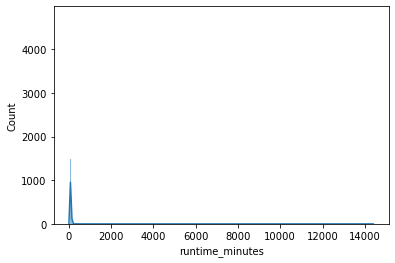

In [140]:
sns.histplot(data=df_test_dropped, x='runtime_minutes', kde=True)

drop the other outlier

In [141]:
df_test_dropped = df_test_dropped.drop([27683])

In [142]:
df_test_dropped['runtime_minutes'].sort_values(ascending=False)

15171    1440.0
71441    1100.0
72424     808.0
67287     746.0
20818     724.0
          ...  
66397       4.0
57389       4.0
20749       3.0
66527       3.0
47173       3.0
Name: runtime_minutes, Length: 66234, dtype: float64

<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

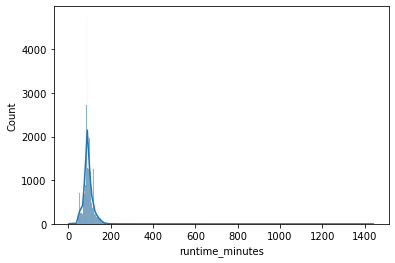

In [143]:
sns.histplot(data=df_test_dropped, x='runtime_minutes', kde=True)

okay 1440 minutes is 24 hours

I should probably drop it down to something more reasonable

3 hours or less

3 hours is 180 minutes
so let's drop all larger than 200 just to be safe

In [144]:
df_test_dropped = df_test_dropped[df_test_dropped['runtime_minutes'] <= 200]

In [145]:
df_test_dropped['runtime_minutes'].sort_values(ascending=False)

70943    200.0
54177    200.0
51169    200.0
260      200.0
1223     200.0
         ...  
57389      4.0
66397      4.0
66527      3.0
47173      3.0
20749      3.0
Name: runtime_minutes, Length: 66078, dtype: float64

<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

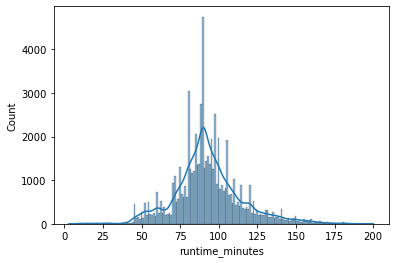

In [146]:
sns.histplot(data=df_test_dropped, x='runtime_minutes', kde=True)

now we're cooking

No handles with labels found to put in legend.


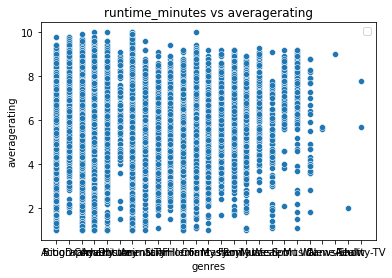

In [147]:
fig, ax = plt.subplots()

# Use seaborn to plot two facets of the above data, colored by the target column
sns.scatterplot(y='averagerating', x='genres', data=df_test_dropped)

ax.set_title('runtime_minutes vs averagerating')
ax.legend();

In [148]:
df_test_dropped['genres'].value_counts()

Drama          16722
Comedy         13035
Documentary    12616
Action          6287
Horror          3933
Biography       3313
Adventure       2455
Crime           2332
Thriller        1294
Animation        865
Romance          586
Family           521
Fantasy          383
Mystery          379
Sci-Fi           322
Music            146
Musical          114
History           94
Sport             67
Western           63
War               30
News               2
Reality-TV         2
Adult              1
Game-Show          1
Name: genres, dtype: int64

I need to group the movies by genre 

variables: avgrating, genres, 

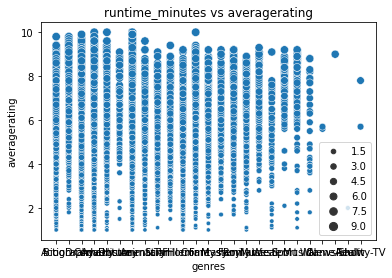

In [149]:
fig, ax = plt.subplots()

# Use seaborn to plot two facets of the above data, colored by the target column
sns.scatterplot(y='averagerating', x='genres', size='averagerating', data=df_test_dropped)

ax.set_title('runtime_minutes vs averagerating')
ax.legend();

In [150]:
df_test_dropped

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Adventure,8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,8.7,136


# 5/8/2023
~~Here's an idea: make a new column that is the average rating by genre, and then use that.~~

~~So:~~

~~Average all the ratings for each genre~~

~~group by genre ~~
~~get teh average rating of all the movies~~


~~I think a series might be easier~~

~~index is genre, entry is average rating~~

also ideas for stacked bar chart

why don't I use tableau first to see how I'm going to make the graph here

So update on the above.

Sean has recommended me check out the groupby function for accomplishing the above. Should be much easier than making whole new columns.


In [151]:
df_test_dropped.to_excel('test.xlsx')

also need to get stats from the normal distribution I made
hypothesis testing

focus on ratings
then how to ratings and profit compare

correlation coefficient, pearson correlation, covariance

correlation - 

covariance - 

check notes

# Hypothesis testing with the movie length

Need to come up with plan.

What do I want to know:

Is there a difference between the lengths of movies of high rated movies and low rated movies?

Could split into two:
* one df has movies <5
* other df has movies >=5

Find the mean, standard deviation, variance, etc

then do a hypothesis test

H0 - The ratings of movies is unaffected by length. 

H1 - The ratings of movies does change with length.


I do have the population so I can just use a z-test maybe.

But if I'm comparing two samples, can I use a z-test?


To use a z-test
* samples must be independent of each other
* the samples should be normally distributed.
* So I need to make sure each one is normally distributed. 
    * And I can make it normally distributed I think
* Also the variances of the two samples should be the same. 

* Let's go ahead and split them and check

In [152]:
# Let's establish a baseline.
df_test_dropped.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,66078.000000,66078.000000,66078.000000,6.607800e+04
mean,2014.252474,93.182633,6.319447,3.931244e+03
std,2.600153,22.054511,1.457663,3.200145e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.100000e+01
75%,2016.000000,104.000000,7.300000,3.480000e+02
max,2019.000000,200.000000,10.000000,1.841066e+06


In [153]:
df_test_dropped.var()

start_year         6.760794e+00
runtime_minutes    4.864015e+02
averagerating      2.124782e+00
numvotes           1.024093e+09
dtype: float64

### info on averagerating column

So the mean rating is 6.3
Standard deviation: 1.5
Variance: 2.1


In [154]:
# Split df-test-dropped into two dfs
df_low = df_test_dropped[ df_test_dropped['averagerating'] < 5 ]
df_high = df_test_dropped[ df_test_dropped['averagerating'] >= 5 ]

In [155]:
df_low.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,11044.000000,11044.000000,11044.000000,11044.000000
mean,2014.217494,92.463329,3.922084,829.457352
std,2.595903,18.848260,0.843232,5635.205721
min,2010.000000,4.000000,1.000000,5.000000
25%,2012.000000,82.000000,3.500000,27.000000
50%,2014.000000,90.000000,4.100000,119.000000
75%,2016.000000,99.000000,4.600000,371.000000
max,2019.000000,200.000000,4.900000,279126.000000


In [156]:
df_high.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,55034.000000,55034.00000,55034.000000,5.503400e+04
mean,2014.259494,93.32698,6.800540,4.553698e+03
std,2.600972,22.64070,1.011768,3.494162e+04
min,2010.000000,3.00000,5.000000,5.000000e+00
25%,2012.000000,81.00000,6.000000,1.400000e+01
50%,2014.000000,91.00000,6.700000,5.200000e+01
75%,2016.000000,105.00000,7.500000,3.400000e+02
max,2019.000000,200.00000,10.000000,1.841066e+06


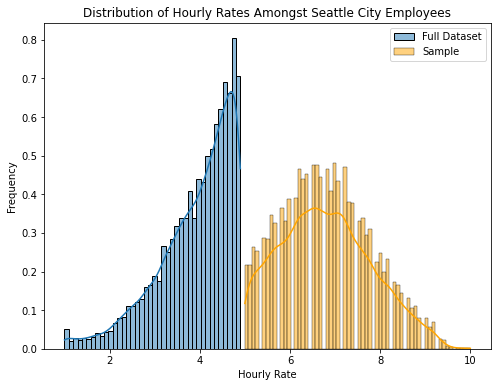

In [157]:
plt.figure(figsize=(8,6))

sns.histplot(df_low['averagerating'], label='Full Dataset', stat='density', kde=True)
sns.histplot(df_high['averagerating'], label='Sample', stat='density', kde=True, color='orange', alpha=.5)

plt.xlabel("Hourly Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Hourly Rates Amongst Seattle City Employees")
plt.legend()
plt.show()

No handles with labels found to put in legend.


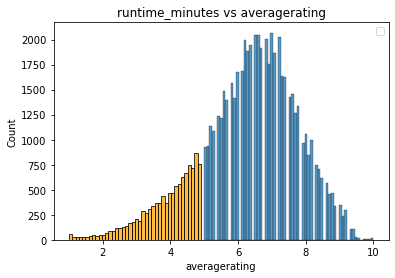

In [160]:
fig, ax = plt.subplots()

# Use seaborn to plot two facets of the above data, colored by the target column
sns.histplot(x='averagerating', data=df_low, color='orange')
sns.histplot(x='averagerating', data=df_high)

ax.set_title('runtime_minutes vs averagerating')
ax.legend();

So it looks like a two sample t-test is going to be the way to go.

I think chopping it all in half may be a blunt way to accomplish this.
    The problem is it isn't sampling. It's dividing in two. 

Maybe sampling each side of the distribution?


But there obviously is a difference in their means.
I need to standardize it. Then I can probably use a z-test.

In [ ]:
# 1. use the central limit theorem to sample each chunk and build a normal distribution
# 2. Standardize the normal distributions
# 3. Use a two-sample t-test to compare the means of the two samples.

## The plan
### 1. use the central limit theorem to sample each chunk and build a normal distribution
### 2. Standardize the normal distributions
### 3. Use a two-sample t-test to compare the means of the two samples.

#### Step 1 - central limit theorem

Low first

In [215]:
k = 1000
n = 100
sample_mean_low = [np.mean(df_low.sample(n=n))[1] for x in range(k)]

No handles with labels found to put in legend.


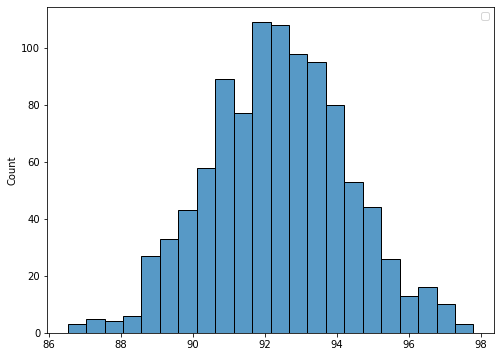

In [216]:
# pop_mean = df_test_dropped['averagerating'].mean()
# samp_mean = np.mean(sample_mean_low)

plt.figure(figsize=(8,6))

sns.histplot(sample_mean_low)

# plt.vlines(pop_mean, ymin=0, ymax=25, color='r', linestyle=':',
#            label=f'Population Mean: {pop_mean:.2f}')
# plt.vlines(samp_mean, ymin=0, ymax=25, color='g', linestyle=':',
#            label=f'Mean of {k} Samples: {samp_mean:.2f}')

plt.legend();

Now high

In [212]:
k = 1000
n = 100
sample_mean_high = [np.mean(df_high.sample(n=n))[1] for x in range(k)]

No handles with labels found to put in legend.


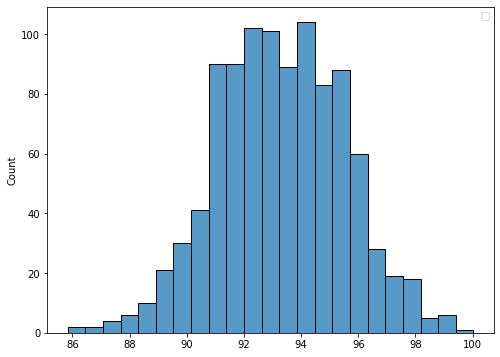

In [213]:
# pop_mean = df_test_dropped['averagerating'].mean()
# samp_mean = np.mean(sample_mean_high)

plt.figure(figsize=(8,6))

sns.histplot(sample_mean_high)

# plt.vlines(pop_mean, ymin=0, ymax=25, color='r', linestyle=':',
#            label=f'Population Mean: {pop_mean:.2f}')
# plt.vlines(samp_mean, ymin=0, ymax=25, color='g', linestyle=':',
#            label=f'Mean of {k} Samples: {samp_mean:.2f}')

plt.legend();

#### Now to standardize

So, these instructions given for standardizing

How are they different than the ones in t-testing?

I'm using instructions from the z-testing notebook, but progressing as-if I'm going to do a t-test.

I need to figure out each exact step.

In [201]:
sample_mean_low_array = np.array(sample_mean_low)
sample_mean_low_array.var()

3.7255069499999998

In [204]:
sample_mean_high_array = np.array(sample_mean_high)
sample_mean_high_array.var()

5.270741515099999

In [220]:
sample_mean_low_array = np.array(sample_mean_low)
sample_mean_low_array.mean()

92.37675

In [219]:
sample_mean_high_array = np.array(sample_mean_high)
sample_mean_high_array.mean()

93.28238999999999

In [221]:
df_test_dropped.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,66078.000000,66078.000000,66078.000000,6.607800e+04
mean,2014.252474,93.182633,6.319447,3.931244e+03
std,2.600153,22.054511,1.457663,3.200145e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.100000e+01
75%,2016.000000,104.000000,7.300000,3.480000e+02
max,2019.000000,200.000000,10.000000,1.841066e+06


Variances are NOT the same.

In [205]:
# Test
z_dist_low = [(x - np.mean(sample_mean_low)) / np.std(sample_mean_low)
          for x in sample_mean_low]

np.mean(z_dist_low)

2.964739564959018e-15

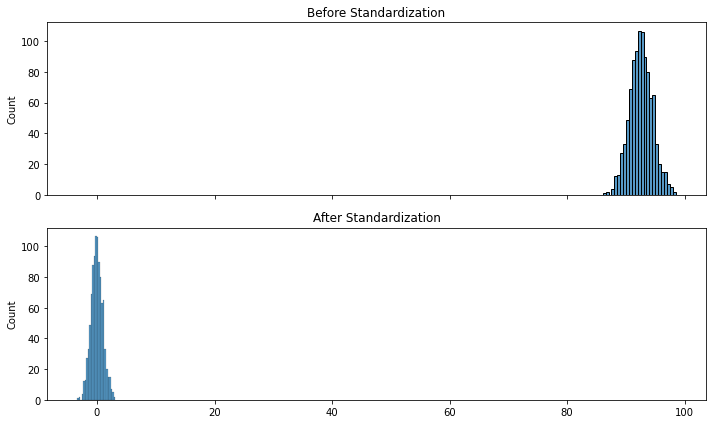

In [206]:
# Visualize it
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6))

sns.histplot(data=sample_mean_low, ax=ax0)
ax0.set_title('Before Standardization')

sns.histplot(data=z_dist_low, ax=ax1)
ax1.set_title('After Standardization')

plt.tight_layout()

In [208]:
z_dist_low_array = np.array(z_dist_low)
z_dist_low_array.var()

1.0000000000000002

In [217]:
z_dist_low_array.mean()

2.964739564959018e-15

wahoo


take original dataframe
add low/high tag

still normal from runtimes

now have an internal flag to compare

In [218]:
# Test
z_dist_high = [(x - np.mean(sample_mean_high)) / np.std(sample_mean_high)
          for x in sample_mean_high]

np.mean(z_dist_high)

3.460343123151688e-15

what best to apply from notes?
z test or t test?

don't need to standardize
have split population into two populations
should now be able to take one of the df's and compare it to the population

but there isn't a big difference in means.

# Copilot test

In [5]:
#write a print statement that says 'hihi'
print('hihi')


hihi


# Github checklist

